# Data Visualization

### Load dataset

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import utils

pd.options.mode.chained_assignment = None # Prevent Pandas's warnings

df = pd.read_csv("car.csv", sep=',') # Import dataset from Excel

print("Total size:", len(df))

df.head()

Total size: 9576


,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


### Filter, clean and format data

In [11]:
df.dropna(inplace=True) # Drop NaN containing (Not a Number) values
print("New size after NaN removal:", len(df))

df = df.loc[df['price'] > 3000] # Select only cars with a price higher than 1k USD
df = df.loc[df['price'] < 15000] # Select only cars with a price lower than 10k USD
df = df.loc[df['engV'] >= 1] # Select only cars with a engV higher than 1.0
df = df.loc[df['engV'] <= 5] # Select only cars with a engV lower than 5.0
df = df.loc[~df['model'].str.contains('ã')]
df = df.loc[~df['model'].str.contains('à')]
df = df.loc[~df['model'].str.contains('ð')]
df = df.loc[~df['model'].str.contains('ó')]
df = df.loc[~df['model'].str.contains('ç')]
print("New size after selections:", len(df))

df['age'] = 2016 - df['year'] # Calculate age of each vehicle
df['price'] = df['price']*5.5 # Calculate price in REAIS (BRL)
print(df.to_string())
df.head()

New size after NaN removal: 8739
New size after selections: 4076
                car         price       body  mileage  engV engType registration  year                  model  drive  age
6             Honda  35750.000000      sedan      199  2.00  Petrol          yes  2003                 Accord  front   13
7           Renault  57750.000000      vagon      185  1.50  Diesel          yes  2011                 Megane  front    5
32       Volkswagen  58850.000000      sedan      147  2.00  Petrol          yes  2007              Passat B6  front    9
34         Chrysler  75350.000000      sedan       70  2.40  Petrol          yes  2008                Sebring  front    8
35       Volkswagen  49494.500000      sedan      120  2.00  Petrol          yes  2008              Passat B6  front    8
40             Audi  21175.000000      vagon      215  2.50  Diesel           no  2002                     A6  front   14
49       Mitsubishi  50600.000000  crossover      110  2.40  Petrol          yes 

,car,price,body,mileage,engV,engType,registration,year,model,drive,age
6,Honda,35750.0,sedan,199,2.0,Petrol,yes,2003,Accord,front,13
7,Renault,57750.0,vagon,185,1.5,Diesel,yes,2011,Megane,front,5
32,Volkswagen,58850.0,sedan,147,2.0,Petrol,yes,2007,Passat B6,front,9
34,Chrysler,75350.0,sedan,70,2.4,Petrol,yes,2008,Sebring,front,8
35,Volkswagen,49494.5,sedan,120,2.0,Petrol,yes,2008,Passat B6,front,8


### Visualize data

4076


,car,price,body,mileage,engV,engType,registration,year,model,drive,age
6,Honda,35750.0,sedan,199,2.0,Petrol,yes,2003,Accord,front,13
7,Renault,57750.0,vagon,185,1.5,Diesel,yes,2011,Megane,front,5
32,Volkswagen,58850.0,sedan,147,2.0,Petrol,yes,2007,Passat B6,front,9
34,Chrysler,75350.0,sedan,70,2.4,Petrol,yes,2008,Sebring,front,8
35,Volkswagen,49494.5,sedan,120,2.0,Petrol,yes,2008,Passat B6,front,8


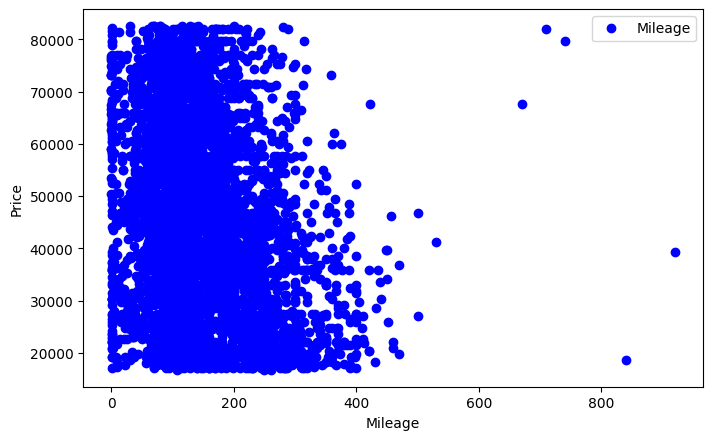

In [12]:
plt.figure(dpi=100, figsize=(8, 5))

#df = df.loc[df['car'] == "Volkswagen"]

#plt.plot(df[['price', 'mileage']], 'o', label=['price', 'mileage'])
plt.plot(df['mileage'], df['price'], 'bo',  label='Mileage')
plt.xlabel("Mileage")
plt.ylabel("Price")

plt.legend()
print(len(df))
df.head()

### Split data

In [13]:
#x = df[['car', 'body', 'mileage', 'engV', 'engType', 'registration', 'year', 'model', 'drive']]
x = df[['mileage', 'age', 'engV']]
#category = df[['car', 'body', 'engType', 'registration', 'model', 'drive']]
category = df[['car']]
y = df['price']

dummies = pd.get_dummies(category)

x = x.join(dummies)
x.head()
#df = df.join(dummies)

,mileage,age,engV,car_Acura,car_Alfa Romeo,car_Aro,car_Audi,car_BMW,car_BYD,car_Bogdan,...,car_Suzuki,car_TATA,car_Toyota,car_UAZ,car_VAZ,car_Volkswagen,car_Volvo,car_ZAZ,car_ZX,car_ËUAZ
6,199,13,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,185,5,1.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32,147,9,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
34,70,8,2.4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,120,8,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Train models

In [14]:
iter=10

parameters={'n_neighbors':3}
parameters={'n_estimators':100, 'learning_rate':0.1, 'max_depth':10}
parameters={}
MAEs = []
MAPEs = []
R2s = []

# MAE - Mean Absolute Error
# MAPE - Mean Absolute Percentage Error
# R² - Coeficiente de determinação

for i in range (0, iter, 1):
    x_train, y_train, x_val, y_val, x_test, y_test = utils.dataset_split(x, y, 0.6, 0.1, 0.3)
    regr = utils.train_L_R(x_train, y_train, parameters)
    answer = utils.evaluate_R(regr, x, y, x_train, y_train, x_val, y_val, x_test, y_test)
    MAEs.append(answer['test']['MAE'])
    MAPEs.append(answer['test']['MAPE'])
    R2s.append(answer['test']['R2'])

avgMAE = sum(MAEs)/len(MAEs)
avgMAPE = sum(MAPEs)/len(MAPEs)
avgR2 = sum(R2s)/len(R2s)

print("Erro Médio Absoluto (R$):", avgMAE)
print("Erro Médio Percentual Absoluto (%):", avgMAPE*100)
print("Coeficiente de determinação R²:", avgR2)

Erro Médio Absoluto (R$): 8639.045119289822
Erro Médio Percentual Absoluto (%): 22.640793765124336
Coeficiente de determinação R²: 0.6095261977493023


### Correlation Matrix

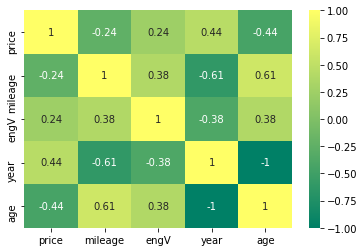

In [15]:
import seaborn as sns

sns.heatmap( df.corr() , annot=True, cmap='summer' )
plt.show()

### Save model

In [16]:
import joblib

#print(x_train.iloc[0].to_dict())

joblib.dump(regr, "car_price_prediction_model.joblib")

['car_price_prediction_model.joblib']

### Save some test data to be looked at later on

In [17]:
df[20:200].to_csv("Dados carro.csv")